# 빅데이터개론2 2022F 과제 8

**제출기한 : 2022년 12월 18일 23시 59분**

각 문제를 읽고 주어진 코드셀에 제시된 변수에 결과를 입력하거나, 주어진 셀에 프로그램 코드 또는 답안을 입력하여 제출하세요.  


아래는 필요한 라이브러리를 불러오는 코드셀입니다. 반드시 숙제를 시작할 때 먼저 실행시키고 문제에서 적절하게 이용하세요.


필요한 패키지와 라이브러리 설치하고 사용할 함수를 먼저 정의한다.


**다음은 과제의 수행과 제출에 대한 안내입니다.**

- 빅데이터개론2 과제는 모두 Colab의 공유 기능을 이용하여 제출하게 됩니다. 자세한 제출방법은 강의시간(또는 동영상)에 알려줄 것입니다.

- 제출시 노트북의 이름(화일명)에서 성명과 학번을 자신의 이름과 학번으로 바꾼 후에 제출해야 합니다. (예: `빅데이터개론2-2022F-과제-01-홍길동-12345677.ipynb`) 

- 답을 입력하는 셀에 있는 `...`는 지우고 답을 입력하세요.

- **과제 노트북은 답을 제시하는 코드셀이나 텍스트셀 이외의 내용 또는 순서를 변경하지 마세요.**



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rc
%matplotlib inline

plt.rc('font', family='NanumBarunGothic') # clolab 에서 한글 사용 
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams["figure.figsize"] = (10,7)   # 그림 크기 조정

In [3]:
#기계학습 모형
from sklearn.linear_model import LogisticRegression

In [4]:
# 표준화 함수
def standarize(x):
  return (x - np.mean(x))/np.std(x, ddof=1)

위의 표준화 함수 `standarize` 에서 사용한 `np.std(x, ddof=1)` 는 `numpy` 패키지에서 표준편차 $SD_x$ 를 구하는 함수이며  `ddof=1` 은 다음과 같이 제곱합을 n-1 로 나누어 주는 옵션을 지정한다.  `ddof` 에 대한 값이 주어지지 않으면 제곱합을 n-1 대신 n 으로 나누어 준다.

$$ SD_x = {\tt np.std(x,ddof=1)} = \frac{1}{n-1} \sum_{i=1}^n (x_i -\bar x)^2$$

**시험에서 표준편차를 계산하는 문제가 나오면 반드시 제곱합을 n-1로 나누는 $SD_x$를 사용해야 한다**

## 1. 회귀직선의 추정

다음과 같이 5개의 $x$ 와 $y$ 의 값이 주어졌다.

| $x$ | $y$ |
|:---:|:--:|
| 1 | 10 |
| 2 | 8 |
| 3 | 2 |
| 4 | 7 |
| 5 | 3| 

아래와 같이 위의 데이터를 포함하는 데이터프레임 `df` 를 만들고 요약통계량을 구해보자 




In [5]:
df = pd.DataFrame({'x': np.array([1.0,2.0,3.0,4.0,5.0]), 'y':np.array([10.0,8.0,2.0,7.0,3.0])})
df

,x,y
0,1.0,10.0
1,2.0,8.0
2,3.0,2.0
3,4.0,7.0
4,5.0,3.0


In [6]:
# 요약통계량
df.describe()

,x,y
count,5.000000,5.000000
mean,3.000000,6.000000
std,1.581139,3.391165
min,1.000000,2.000000
25%,2.000000,3.000000
50%,3.000000,7.000000
75%,4.000000,8.000000
max,5.000000,10.000000


In [7]:
# x의 평균
np.mean(df.x)

3.0

In [8]:
# x의 표준편차: SDx
np.std(df.x, ddof=1)

1.5811388300841898

In [9]:
# 상관계수
df.corr()

,x,y
x,1.000000,-0.699379
y,-0.699379,1.000000


다음은 데이터프레임의 컬럼 `x` 와 `y` 의 표준화된 값을 `xst` 와 `yst` 열에 저장하는 프로그램이다. 

$$ xst_i= \left ( \frac{x_i -\bar x}{SD_x} \right ), \quad yst_i = \left ( \frac{y_i -\bar y}{SD_y} \right )$$


In [10]:
df['xst'] = standarize(df.x)
df['yst'] = standarize(df.y)
df

,x,y,xst,yst
0,1.0,10.0,-1.264911,1.179536
1,2.0,8.0,-0.632456,0.589768
2,3.0,2.0,0.000000,-1.179536
3,4.0,7.0,0.632456,0.294884
4,5.0,3.0,1.264911,-0.884652


다음 코드의 결과가 상관계수 $r$ 과 동일한 값임에 유의하세요.


$$r = \frac{1}{n-1} \sum_{i=1}^n  \left ( \frac{x_i -\bar x}{SD_x} \right ) \left ( \frac{y_i -\bar y}{SD_y} \right ) = \frac{1}{n-1}  \sum_{i=1}^n z_i w_i$$

In [11]:
np.sum(df.xst * df.yst)/(5-1)

-0.6993786061802354

**아래 질문에 답은 위에서 주어진 요약 통계량에 대한 결과를 이용하여 계산기(또는 손으로) 계산하여 답안만 주어진 텍스트셀에 제시하시오**

**문제 1**

$x$ 와 $y$ 의 상관계수를 구하시오.

[답안] 

- r = -0.6993788156

**문제 2**

다음과 같이 선형회귀 모형을 가정할 때 절편 $\beta_0$과 기울기 $\beta_1$의 최소 제곱 추정량을 계산하시오.

$$ E(y|x) = \beta_0 + \beta_ 1 x $$


[답안] 
- beta0 = 10.50000088
- beta1 = -1.500000292  

## 2. 동대문구 아파트 가격

2019년 동대문구 아파트 가격과 면적 간의 관계를 알아 보기 위하여 다음과 같이 외부 화일에서 데이터를 읽고 분석 데이터를  데이터프레임 `apart_2019` 에 저장하였다.

In [12]:
url = "https://ilovedata.github.io/teaching/bigdata2/data/seoul_apartment_2019.csv"
apart_2019_1 = pd.read_csv(url, encoding="CP949")

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


다음 코드는 단순회귀모형을 추정하기 위한 자료의 전처리 작업을 수행한다.

In [13]:
#필요한 변수만 선택
apart_2019_2 = apart_2019_1[['신고년도', '자치구명', '건물면적',  '층정보', '건축년도','건물주용도', '물건금액']]

# 건축연도가 0 보다 큰 아파트만 선택 (선분양 아파트는 아직 건축되지 않았기 때문에 건축연도가 0이며 분석에서 제외)
apart_2019_3 = apart_2019_2.loc[ (apart_2019_2['건물주용도'] == "아파트") & (apart_2019_2['건축년도'] > 0.0)]

# 층과 연도를 정수 형식으로 변환
apart_2019_4 = apart_2019_3.astype({'층정보': 'int', '건축년도': 'int', '신고년도': 'int'})

# 거래 가격의 단위를 백만원으로 
price = apart_2019_4['물건금액']/1000000

# 거래 가격을 정수 형식으로 변환 
price = price.astype('int')
apart_2019_4['price'] = price

# 열이름을 영문으로 변환
apart_2019_5 = apart_2019_4.rename(columns={'신고년도': 'year_sale', '자치구명':'gu','건물면적':'area', '층정보':'floor', '건축년도':'year_built', '건물주용도':'type', '물건금액':'orig_price'})

# 행 인덱스의  초기화
apart_2019_6 = apart_2019_5[['year_sale', 'gu', 'area','floor','year_built','price']].reset_index(drop=True)

# 동대문구 자료만 선택
apart_2019 = apart_2019_6.loc[apart_2019_6.gu == '동대문구']

전처리를 수행한 후 동대붐구 자료를 저장한 데이터프레임 `apart_2019`의 열이름과 의미는 다음과 같다.

- `year_sale` : 거래년도
- `gu` : 행정단위(구)
- `area` : 면적(1000sqm)
- `floor` : 아파트 층수
- `year_built`: 아파트가 처음 지어진 년도
- `price` : 아파트가격

In [14]:
apart_2019.head(3)

,year_sale,gu,area,floor,year_built,price
23,2019,동대문구,76.63,4,1987,680
24,2019,동대문구,84.96,8,2014,1158
25,2019,동대문구,82.18,12,1987,655


In [15]:
# 요약 통계량
apart_2019.describe()

,year_sale,area,floor,year_built,price
count,2480.0,2480.000000,2480.000000,2480.000000,2480.000000
mean,2019.0,70.307113,9.911694,2005.427016,570.352016
std,0.0,27.813367,5.812995,8.534267,244.699003
min,2019.0,11.960000,1.000000,1971.000000,97.000000
25%,2019.0,59.670000,5.000000,2000.000000,436.000000
50%,2019.0,76.340000,9.000000,2005.000000,570.000000
75%,2019.0,84.950000,14.000000,2013.000000,697.000000
max,2019.0,170.380000,30.000000,2019.000000,1430.000000


**문제 1** 

동대문구 아파트의 면적(`area`)과 거래 가격(`price`)의  산점도를 그리는 파이썬 코드를 작성하시오.

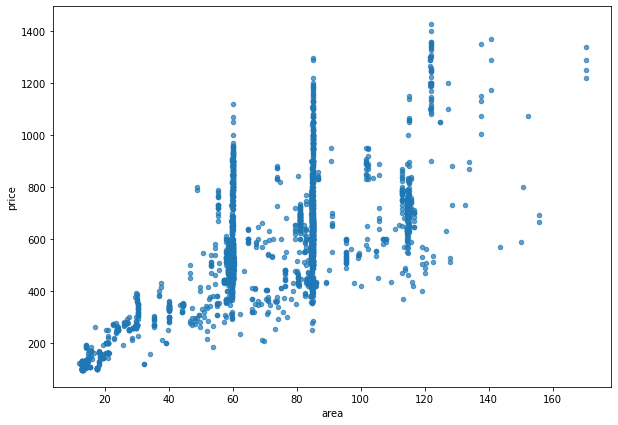

In [29]:
apart_2019.plot.scatter(x = 'area', y = 'price', alpha = 0.7)

**문제 2**

동대문구 아파트의 면적(area)과 거래 가격(price)의 상관계수를 계산하는 파이쎤 코드를 작성하시오.

In [30]:
corr_apart = apart_2019[['area', 'price']].corr()
corr = corr_apart.iloc[0,1]
corr

0.7221897182527665

**아래 질문에 답은 위에서 주어진 요약 통계량에 대한 결과를 이용하여 계산기(또는 손으로) 계산하여 답안만 주어진 텍스트셀에 제시하시오**

**문제 3**

동대문구 아파트의 면적(area)과 거래 가격(price)에 대하여 다음과 같은 선형 회귀모형을 가정하였을 때 
절편 $\beta_0$ 와 기울기 $\beta_1$ 의 최소제곱 추정값 `beta0` ,`beta1` 을 구하고 다음 텍스트 셀에 기입하시오

$$ E(\text{price} | \text{area}) = \beta_0 + \beta_1 \text{ area} $$


[답안] 
- beta0 = 123.63838
- beta1 = 6.35375  

**문제 4**

위의 문제 3에서 구한 선형 회귀직선을 이용하여 아파트의 면적이 100 제곱미터인 경우 평균 가격의 예측값 `price_est` 을 구하시오. 


[답안] 
- price_est = 759.01338

## 3. 심장병 데이터

심혈관 질환(Cardiovascular disease)은 전 세계 사망 원인 1위이며 매년 약 1,790만 명이 사망하며 이는 전 세계 사망의 31%를 차지한다. 심혈관 질환으로 인한 사망 5건 중 4건은 심장마비와 뇌졸중으로 인한 것이며, 이 중 3분의 1은 70세 미만에서 조기에 발생한다. 

이 절에서 이용할 자료는 [Kaggle](https://www.kaggle.com/fedesoriano/heart-failure-prediction?select=heart.csv)
 에서 얻을 수 있는 공공 데이터 세트이며 심장 질환을 예측하는 데 사용할 수 있는 11가지 변수가 포함된 자료이다.

자료를 다운로드 하여 데이터프레임 `heart` 에 저장하자.

In [18]:
url = "https://ilovedata.github.io/teaching/bigdata2/data/heart.csv"
heart = pd.read_csv(url)

In [19]:
heart['FastingBS'] = heart['FastingBS'].astype(int)
heart['HeartDisease'] = heart['HeartDisease'].astype(int)

In [20]:
heart.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


데이터프레임 `heart` 의 각 열에 대한 설명은 다음과 같다. 마지막 변수 `HeartDisease` 가 반응변수이며 나머지는 모두 설명변수이다.

| Feature | Description |
| :- | :- |
| Age | 연령 (연) |
| Sex | 성별 (M: 남성, F: 여성) |
| ChestPainType | 가슴의 통증 분류 [TA: 전형적인 협심증 통증(Typical Angina), ATA: 비전형적 협심증(Atypical Angina, NAP: 비협심증 통증(Non-Anginal Pain), ASY: 없음) |
| RestingBP | 혈압 (mm Hg) |
| Cholesterol | 콜레스테롤 (mm/dl) |
| FastingBS | 공복혈당 (1: 만약 공복혈당 > 120 mg/dl, 0: 아니면) |
| RestingECG | 심전도 결과 (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria) |
| MaxHR | 최대 심박수 (60 과 202 사이의 숫자) |
| ExerciseAngina | 운동 유발성 협심증 (Y: 예, N: 아니오) |
| Oldpeak | oldpeak = ST (Numeric value measured in depression) |
| ST_Slope | the slope of the peak exercise ST segment (Up: upslo ping, Flat: flat, Down: downsloping) |
| HeartDisease | 결과 (1: 심장병 있음, 0: 심장병 없음) |



최대 심박수(`MaxHR`)가 심장병 발병(`HeartDisease`)에 미치는 영향을 알아보기 위하여 다음과 같은 로지스틱 회귀모형을 고려하였다.

- 설명변수 `x`: 최대 심박수(`MaxHR`)를 표준화한 값
- 반응변수 `y`: 심장병 발병의 유무 (1 이면 심장병 발병, 0 이면 심장병 없음)



$$ P(y=1 | x) = \frac{ \exp(\beta_0 + \beta_1 x)}{1+\exp(\beta_0 + \beta_1 x)} $$

위의 식에서 

$$ x = \frac{\text{ MaxHR} - \text{mean(MaxHR)}}{\text{std(MaxHR)}}$$


$$ 
y=
\begin{cases}
1 & \text{ if HeartDisease } = 1 \\ 
0 & \text{ if HeartDisease } = 0 \\ 
\end{cases}
$$

아래 코드는 위의 로지스틱 회귀 모형의 계수 $\beta_0$ 와 $\beta_1$ 을 추정하는 파이썬 코드와 그 결과이다.

In [21]:
# 최대 심박수
XX =  heart[['MaxHR']]
XX

,MaxHR
0,172
1,156
2,98
3,108
4,122
...,...
913,132
914,141
915,115
916,174


In [22]:
# 최대 심박수의 요약 통계량
XX.describe()

,MaxHR
count,918.000000
mean,136.809368
std,25.460334
min,60.000000
25%,120.000000
50%,138.000000
75%,156.000000
max,202.000000


In [23]:
# 최대 심박수의 표준화하여 독립변수 X 생성
X = np.array(standarize(XX.MaxHR))
X[1:10]

array([ 0.75374627, -1.5243071 , -1.13153928, -0.58166433,  1.30362122,
        1.30362122,  0.20387132, -0.26745007, -0.66021789])

In [24]:
pd.DataFrame(X).describe()

,0
count,9.180000e+02
mean,5.263280e-16
std,1.000000e+00
min,-3.016825e+00
25%,-6.602179e-01
50%,4.676419e-02
75%,7.537463e-01
max,2.560478e+00


In [25]:
# 반응변수 y
y = heart['HeartDisease']
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [26]:
# 로지스틱 회귀모형 정의
heart2_logistic_model = LogisticRegression()
# 모형적합
heart2_logistic_model.fit(X.reshape(-1, 1), y)
# beta0
b0 = heart2_logistic_model.intercept_[0]
# beta1 
b1 =heart2_logistic_model.coef_.T
b0, b1

(0.26182879097139505, array([[-0.93662699]]))

In [27]:
b0, b1[0]

(0.26182879097139505, array([-0.93662699]))

위에서 구한 계수의 추정치를 이용하여 적합한 로지스틱 회귀모형에서 구한 심장병 발병의 예측확률 $P(y=1|x)$ 을 그리면 다음과 같이 나타난다.

$$ P(y=1 | x) = \frac{ \exp(\hat \beta_0 + \hat \beta_1 x)}{1+\exp( \hat\beta_0 + \hat \beta_1 x)}  =\frac{ 1}{1+\exp(-[ \hat\beta_0 + \hat \beta_1 x])} =\frac{ 1}{1+\exp(-[ (0.2618) + (-0,9361) x])}$$

위에서 주어진 로지스틱 회귀모형은 최대 심박수(MaxHR)의 **표준화된 값 $x$** 를 이용하였음에 유의하자.


$$ x = \frac{\text{ MaxHR} - \text{mean(MaxHR)}}{\text{std(MaxHR)}}$$




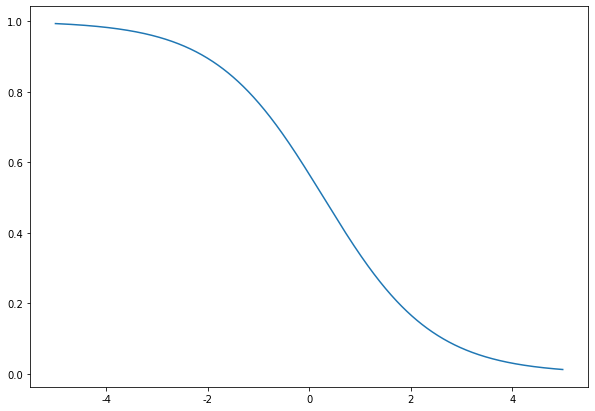

In [28]:
# x, beta0, beta1  이 주어진 경우 예측 확률을 구하는 함수  
def logistic_curve(x, beta0, beta1):
  p = 1.0/(1.0+ np.exp(-beta0 -beta1*x)) 
  return p

# x의 값
xx = np.arange(-5,5,0.01)

# 예측 확률의 그림 
plt.plot(xx, logistic_curve(xx,b0,b1[0]) )
plt.show()

**아래 질문에 답은 위에서 주어진 요약 통계량에 대한 결과를 이용하여 계산기(또는 손으로) 계산하여 답안만 주어진 텍스트셀에 제시하시오**

**문제 1**

위에서 구한 로지스틱 회귀모형을 이용하여 최대 심박수(MaxHR)가 156 인 경우 심장병의 발생 확률 $p$ 를 계산하시오.



[답안]
- p =  0.390842

**문제 2**

위에서 구한 로지스틱 회귀모형에서 예측의 확률이 0.5 가 되는 최대 심박수(MaxHR) 는 얼마인가?

$$ 0.5  =\frac{ 1}{1+\exp(-[ \hat\beta_0 + \hat \beta_1 x])}$$


[답안]

- MaxHR = 143.9304